In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
train = pd.read_csv('c:/data/project/train.csv')
test = pd.read_csv('c:/data/project/test.csv')

In [4]:
# train 복사
train1 = train.copy()
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


## Data Preprocessing

In [5]:
train1.drop(columns=['ID','first_party', 'second_party'], inplace=True)

In [6]:
train1.head()

,facts,first_party_winner
0,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Ramon Nelson was riding his bike when he suffe...,0
2,An Alabama state court convicted Billy Joe Mag...,1
3,Victor Linkletter was convicted in state court...,0
4,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [7]:
df = train1[['facts', 'first_party_winner']]
df_target = df[['first_party_winner']]
df_nlp = df[['facts']]
df_nlp1 = pd.DataFrame(df_nlp, columns=['facts'])
df_nlp1['facts'] = df_nlp1['facts'].str.replace(r'<[^<>]*>', '', regex=True)
# df_target
df_nlp1

,facts
0,"On June 27, 1962, Phil St. Amant, a candidate ..."
1,Ramon Nelson was riding his bike when he suffe...
2,An Alabama state court convicted Billy Joe Mag...
3,Victor Linkletter was convicted in state court...
4,"On April 24, 1953 in Selma, Alabama, an intrud..."
...,...
2473,Congress amended the Clean Air Act through the...
2474,"Alliance Bond Fund, Inc., an investment fund, ..."
2475,"In 1992, the District Court sentenced Manuel D..."
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per..."


In [8]:
# !pip install nltk

In [9]:
import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
from nltk.tokenize import WhitespaceTokenizer
# 공백 단위로 쪼개기
corpus = df_nlp1["facts"]
Tokenizer=WhitespaceTokenizer()
lst_tokens = Tokenizer.tokenize(str(corpus))
lst_tokens

['0',
 'On',
 'June',
 '27,',
 '1962,',
 'Phil',
 'St.',
 'Amant,',
 'a',
 'candidate',
 '...',
 '1',
 'Ramon',
 'Nelson',
 'was',
 'riding',
 'his',
 'bike',
 'when',
 'he',
 'suffe...',
 '2',
 'An',
 'Alabama',
 'state',
 'court',
 'convicted',
 'Billy',
 'Joe',
 'Mag...',
 '3',
 'Victor',
 'Linkletter',
 'was',
 'convicted',
 'in',
 'state',
 'court...',
 '4',
 'On',
 'April',
 '24,',
 '1953',
 'in',
 'Selma,',
 'Alabama,',
 'an',
 'intrud...',
 '...',
 '2473',
 'Congress',
 'amended',
 'the',
 'Clean',
 'Air',
 'Act',
 'through',
 'the...',
 '2474',
 'Alliance',
 'Bond',
 'Fund,',
 'Inc.,',
 'an',
 'investment',
 'fund,',
 '...',
 '2475',
 'In',
 '1992,',
 'the',
 'District',
 'Court',
 'sentenced',
 'Manuel',
 'D...',
 '2476',
 'On',
 'March',
 '8,',
 '1996,',
 'Enrico',
 'St.',
 'Cyr,',
 'a',
 'lawful',
 'per...',
 '2477',
 'Herbert',
 'Markman',
 'owns',
 'the',
 'patent',
 'to',
 'a',
 'system',
 'th...',
 'Name:',
 'facts,',
 'Length:',
 '2478,',
 'dtype:',
 'object']

In [11]:
import nltk

# 어절 별로 쪼개기
corpus = df_nlp1["facts"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))

ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()

lst_tokens

['On',
 'June',
 '27',
 ',',
 '1962',
 ',',
 'Phil',
 'St.',
 'Amant',
 ',',
 'a',
 'candidate',
 'for',
 'public',
 'office',
 ',',
 'made',
 'a',
 'television',
 'speech',
 'in',
 'Baton',
 'Rouge',
 ',',
 'Louisiana',
 '.',
 'During',
 'this',
 'speech',
 ',',
 'St.',
 'Amant',
 'accused',
 'his',
 'political',
 'opponent',
 'of',
 'being',
 'a',
 'Communist',
 'and',
 'of',
 'being',
 'involved',
 'in',
 'criminal',
 'activities',
 'with',
 'the',
 'head',
 'of',
 'the',
 'local',
 'Teamsters',
 'Union',
 '.',
 'Finally',
 ',',
 'St.',
 'Amant',
 'implicated',
 'Herman',
 'Thompson',
 ',',
 'an',
 'East',
 'Baton',
 'Rouge',
 'deputy',
 'sheriff',
 ',',
 'in',
 'a',
 'scheme',
 'to',
 'move',
 'money',
 'between',
 'the',
 'Teamsters',
 'Union',
 'and',
 'St.',
 'Amant',
 '’',
 's',
 'political',
 'opponent',
 '.',
 'Thompson',
 'successfully',
 'sued',
 'St.',
 'Amant',
 'for',
 'defamation',
 '.',
 'Louisiana',
 '’',
 's',
 'First',
 'Circuit',
 'Court',
 'of',
 'Appeals',
 'reve

In [12]:
lst_stopwords = nltk.corpus.stopwords.words("english")
# NLTK가 정의한 영어 불용어 리스트를 리턴
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
import re

def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None): 
## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [14]:
from collections import Counter

stop_words = 'court case state action'

stop_words = set(stop_words.split(' '))
# 불용어 제외
corpus = [word for word in corpus if not word in stop_words]

counts = Counter(corpus)
tags = counts.most_common(100)

tags

[('On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rather

In [15]:
df_nlp1["facts_clean"] = df_nlp1["facts"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

df_nlp1

,facts,facts_clean
0,"On June 27, 1962, Phil St. Amant, a candidate ...",june 27 1962 phil st amant candidate public of...
1,Ramon Nelson was riding his bike when he suffe...,ramon nelson riding bike suffered lethal blow ...
2,An Alabama state court convicted Billy Joe Mag...,alabama state court convicted billy joe magwoo...
3,Victor Linkletter was convicted in state court...,victor linkletter convicted state court eviden...
4,"On April 24, 1953 in Selma, Alabama, an intrud...",april 24 1953 selma alabama intruder broke apa...
...,...,...
2473,Congress amended the Clean Air Act through the...,congress amended clean air act energy policy a...
2474,"Alliance Bond Fund, Inc., an investment fund, ...",alliance bond fund inc investment fund purchas...
2475,"In 1992, the District Court sentenced Manuel D...",1992 district court sentenced manuel peguero 2...
2476,"On March 8, 1996, Enrico St. Cyr, a lawful per...",march 8 1996 enrico st cyr lawful permanent re...


In [16]:
df_nlp2 = pd.concat([df_nlp1,df_target['first_party_winner']],axis=1, join='inner')

df_nlp2["first_party_winner"].value_counts()

first_party_winner
1    1649
0     829
Name: count, dtype: int64

In [17]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

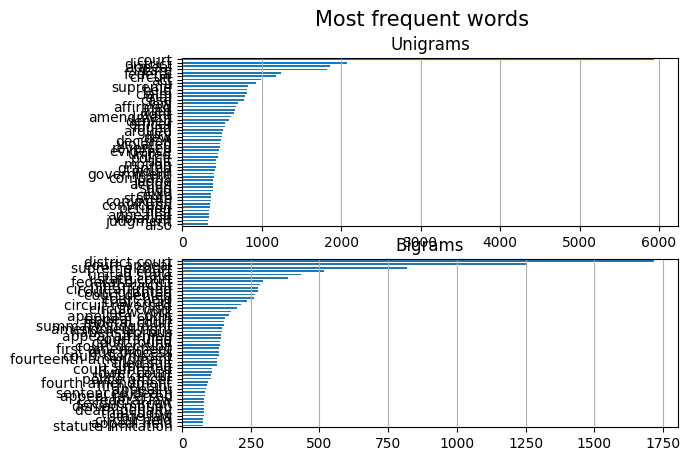

<Figure size 3000x2400 with 0 Axes>

In [18]:
y = 1
corpus = df_nlp2[df_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.suptitle("Most frequent words", fontsize=15)
figure(figsize=(30, 24))
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                    columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
                kind="barh", title="Unigrams", ax=ax[0], 
                legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                    columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                string for string in x) )
dtf_bi.set_index("Word").iloc[:50,:].sort_values(by="Freq").plot(
                kind="barh", title="Bigrams", ax=ax[1],
                legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [19]:
y=1
corpus1 = df_nlp2[df_nlp2["first_party_winner"]== y]["facts_clean"]
lst_tokens = nltk.tokenize.word_tokenize(corpus1.str.cat(sep=" "))

dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
# dtf_uni[40:60]
dtf_uni

,Word,Freq
0,court,5943
1,district,2071
2,appeal,1856
3,state,1827
4,federal,1250
...,...,...
14404,uninterrupted,1
14405,mexicano,1
14406,desarrollo,1
14407,insolvency,1


In [20]:
!pip install wordcloud

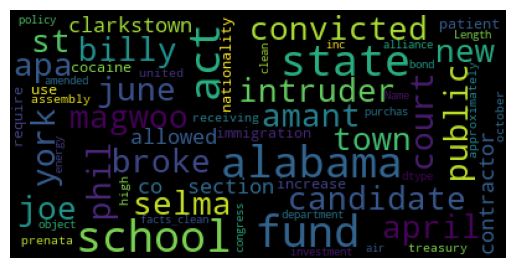

In [21]:
import wordcloud

wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                        max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
#train_nlp2 = pd.concat([train_nlp,train_target['first_party_winner']],axis=1, join='inner')
xfeatures = df_nlp2['facts_clean']
ylabel = df_nlp2['first_party_winner']

In [23]:
vectorizer = TfidfVectorizer()
def get_vector(vectorizer, df, train_mode):
    if train_mode:
        X_facts = vectorizer.fit_transform(df['facts'])
    else:
        X_facts = vectorizer.transform(df['facts'])
    X_party1 = vectorizer.transform(df['first_party'])
    X_party2 = vectorizer.transform(df['second_party'])
    
    X = np.concatenate([X_party1.todense(), X_party2.todense(), X_facts.todense()], axis=1)
    return X

In [24]:
X_train = get_vector(vectorizer, train, True)
Y_train = train["first_party_winner"]
X_test = get_vector(vectorizer, test, False)

## Define Model & Train

In [25]:
model = LogisticRegression()
model.fit(X_train, Y_train)

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html

## Inference & Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
pred = model.predict(X_test)

In [ ]:
submit['first_party_winner'] = pred
submit.to_csv('./baseline_submit.csv', index=False)
print('Done')

Done
